# Soil Erosion LEAFs Conservation Tillage
The RUSLE model can incorporate the effects of reduced tillage, and other land management practices, through simply modification in the C factor. Panagos et al. (2015) shows that for arable crops, the C factor can be disaggregated into. Note that there's currently no differentiation between irrigation practices soil erosion rates, despite having each their own set of values, as some rasters have small differences in where this can be implemented.

$C_{arable} = C_{crop} \cdot C_{mgmt}$

Where $C_{mgmt}$ represents the C factor of land management options including tillage, residues, and cover crops. This is also expressed by a simple multiplication:

$C_{mgmt} = C_{tillage} \cdot C_{residues} \cdot C_{cover}$

For **tillage**, a value of 1, 0.35, or 0.25 is assigned respectively to conventional tillage, reduced/conservation tillage, and No-Till practices.

For **residue management**, it can be calculated as:

$C_{residues} = 1 - 0.12 \cdot F_{residues}$

Where $F_{residues}$ is the fraction of land that leaves residues on the field.

Finally, for **cover crops**, $C_{cover}$ can be calculated as:

$C_{cover} = 1 - 0.2 \cdot F_{cover}$

Where $F_{cover}$ is the fraction of land that uses cover crops during winter or spring. 

## Conservation Tillage Scenarios
Soil Erosion LEAFs have been calculated for the following crops and scenarios, and can be used to assess the local benefits of reduced tillage when compared to the already calculated traditional tillage scenarios.

| Crop      |  Residue Management |
|:----------|:-----------------:|
| Barley    |  Removed from field |
| Barley    |  Left on the field |
| Cotton    |  Not Applicable |
| Maize    |  Removed from field |
| Maize    |  Left on the field |
| Rapeseed    |  Removed from field |
| Rapeseed    |  Left on the field |
| Sorghum    |  Removed from field |
| Sorghum    |  Left on the field |
| Soybean    |  Not Applicable |
| Sunflower    |  Not Applicable |
| Wheat    |  Removed from field |
| Wheat    |  Left on the field |
| Wheat    | Removed from field |

The file [`lu_c_factor_reducedtillage.xlsx`](../data/crops/lu_c_factor_reducedtillage.xlsx) summarizes all the $C$ factors used

## Creating C-Factor rasters
Just as done in [SoilErosion_Baseline_LEAFs](../documentation/SoilErosion_Baseline_LEAFs.ipynb), C factor rasters are created for each $Crop \times Management$ scenario, which is done using the information in `lu_c_factor_reducedtillage.xlsx`

In [1]:
# Modules
import sbtn_leaf.map_plotting as mp
import sbtn_leaf.map_calculations as mc

import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

Could not determine dtype for column 1, falling back to string


In [2]:
# Data
scenarios = pl.read_excel("../data/crops/lu_c_factor_reducedtillage.xlsx")
scenarios.head()

file_name,land_use,path,crop_name,irrigation_type,on_off_field,tillage,commodity_type,crop_type,crop_class,crop_subclass,c_crop,c_res,c_tillage,c_final
str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64
"""lu_Irrigated_Barley_residues_l…","""Barley_irr_ron_rt""","""../data/land_use/lu_Irrigated_…","""Barley""","""Irrigated""","""on""","""reduced""","""annual_crop""","""annual""","""Cereals""","""Various""",0.2,0.88,0.35,0.0616
"""lu_Irrigated_Barley_residues_r…","""Barley_irr_roff_rt""","""../data/land_use/lu_Irrigated_…","""Barley""","""Irrigated""","""off""","""reduced""","""annual_crop""","""annual""","""Cereals""","""Various""",0.2,1.0,0.35,0.07
"""lu_Rainfed_Barley_residues_lef…","""Barley_rf_ron_rt""","""../data/land_use/lu_Rainfed_Ba…","""Barley""","""Rainfed""","""on""","""reduced""","""annual_crop""","""annual""","""Cereals""","""Various""",0.2,0.88,0.35,0.0616
"""lu_Rainfed_Barley_residues_rem…","""Barley_rf_roff_rt""","""../data/land_use/lu_Rainfed_Ba…","""Barley""","""Rainfed""","""off""","""reduced""","""annual_crop""","""annual""","""Cereals""","""Various""",0.2,1.0,0.35,0.07
"""lu_Irrigated_Maize_residues_le…","""Maize_irr_ron_rt""","""../data/land_use/lu_Irrigated_…","""Maize""","""Irrigated""","""on""","""reduced""","""annual_crop""","""annual""","""Cereals""","""Maize""",0.38,0.88,0.35,0.11704


Next step is to generate the C-Factor value in the original land use raster resolution (~10km) and then downsampling to 25km from the RLSK layer. The 10km files have not been preserved, but can be generated as follow:

In [3]:
output_folder = "../data/soil_erosion/C_Factors/10km/"

In [4]:
for row in scenarios.iter_rows(named=True):
    input_path = row["path"]
    c_factor = row["c_final"]
    land_use_type = row["land_use"]
    output_path = output_folder + "cfactor_10km_" + land_use_type + ".tif"

    print(f"Rasterizing {land_use_type} land use with a c factor of {c_factor}")

    mc.create_binary_mask(input_path, output_path, binary_value=c_factor, src_nodata=255, dst_nodata=np.nan)
    print(f"{land_use_type} rasterized successfully!\n")

Rasterizing Barley_irr_ron_rt land use with a c factor of 0.0616
Input No Data defined as 255. Value 0.0616 if is not 255 and nan if it is.
Barley_irr_ron_rt rasterized successfully!

Rasterizing Barley_irr_roff_rt land use with a c factor of 0.06999999999999999
Input No Data defined as 255. Value 0.06999999999999999 if is not 255 and nan if it is.
Barley_irr_roff_rt rasterized successfully!

Rasterizing Barley_rf_ron_rt land use with a c factor of 0.0616
Input No Data defined as 255. Value 0.0616 if is not 255 and nan if it is.
Barley_rf_ron_rt rasterized successfully!

Rasterizing Barley_rf_roff_rt land use with a c factor of 0.06999999999999999
Input No Data defined as 255. Value 0.06999999999999999 if is not 255 and nan if it is.
Barley_rf_roff_rt rasterized successfully!

Rasterizing Maize_irr_ron_rt land use with a c factor of 0.11704
Input No Data defined as 255. Value 0.11704 if is not 255 and nan if it is.
Maize_irr_ron_rt rasterized successfully!

Rasterizing Maize_irr_roff_r

Now downsampling into 25km

In [5]:
input_folder = "../data/soil_erosion/C_Factors/10km/"
output_folder = "../data/soil_erosion/C_Factors/25km/"
rlsk_fp = "../data/soil_erosion/rlsk_2012.tif"

for file in os.listdir(input_folder):
    # file names
    file_name = os.path.basename(file)

    if "_rt" in file_name:
        new_file_name = file_name.replace("10km", "25km")
        input_path = input_folder + file_name
        output_path = output_folder + new_file_name
        
        # Operation
        mc.resample_to_match(src_path=input_path, target_path=rlsk_fp, output_path=output_path)
        print(f"{file_name} resampled into rlsk raster resolution")
    else:
        continue
    

cfactor_10km_Barley_irr_roff_rt.tif resampled into rlsk raster resolution
cfactor_10km_Barley_irr_ron_rt.tif resampled into rlsk raster resolution
cfactor_10km_Barley_rf_roff_rt.tif resampled into rlsk raster resolution
cfactor_10km_Barley_rf_ron_rt.tif resampled into rlsk raster resolution
cfactor_10km_Cotton_irr_rt.tif resampled into rlsk raster resolution
cfactor_10km_Cotton_rf_rt.tif resampled into rlsk raster resolution
cfactor_10km_Maize_irr_roff_rt.tif resampled into rlsk raster resolution
cfactor_10km_Maize_irr_ron_rt.tif resampled into rlsk raster resolution
cfactor_10km_Maize_rf_roff_rt.tif resampled into rlsk raster resolution
cfactor_10km_Maize_rf_ron_rt.tif resampled into rlsk raster resolution
cfactor_10km_Rapeseed_irr_roff_rt.tif resampled into rlsk raster resolution
cfactor_10km_Rapeseed_irr_ron_rt.tif resampled into rlsk raster resolution
cfactor_10km_Rapeseed_rf_roff_rt.tif resampled into rlsk raster resolution
cfactor_10km_Rapeseed_rf_ron_rt.tif resampled into rlsk r

## Soil Erosion Rates
Now, the RLSK layer already generated can be multiplied by the C factor of each land use to calculate the new erosion rates

In [22]:
input_folder = "../data/soil_erosion/C_Factors/25km/"
output_folder = "../LEAFs/soil_erosion/raster/"

for file in os.listdir(input_folder):
    # file names
    file_name = os.path.basename(file)
    if "_rt" in file_name:
        new_file_name = file_name.replace("cfactor", "se_rate")
        input_path = input_folder + file_name
        output_path = output_folder + new_file_name
        
        # Operation
        mc.multiply_rasters([rlsk_fp, input_path], output_path)
        print(f"Soil erosion calculated for {file_name}")
    else:
        continue

Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Barley_irr_roff_rt.tif
Soil erosion calculated for cfactor_25km_Barley_irr_roff_rt.tif
Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Barley_irr_ron_rt.tif
Soil erosion calculated for cfactor_25km_Barley_irr_ron_rt.tif
Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Barley_rf_roff_rt.tif
Soil erosion calculated for cfactor_25km_Barley_rf_roff_rt.tif
Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Barley_rf_ron_rt.tif
Soil erosion calculated for cfactor_25km_Barley_rf_ron_rt.tif
Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Cotton_irr_rt.tif
Soil erosion calculated for cfactor_25km_Cotton_irr_rt.tif
Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Cotton_rf_rt.tif
Soil erosion calculated for cfactor_25km_Cotton_rf_rt.tif
Raster saved into ../LEAFs/soil_erosion/raster/se_rate_25km_Maize_irr_roff_rt.tif
Soil erosion calculated for cfactor_25km_Maize_irr_roff_rt.tif
Ras

### Checking results

In [23]:
wheat_ron_fp = "../LEAFs/soil_erosion/raster/se_rate_25km_Rainfed_Wheat_residues_left_on_the_field.tif"
wheat_ron_rt_fp = "../LEAFs/soil_erosion/raster/se_rate_25km_Wheat_rf_ron_rt.tif"

C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\map_plotting.py:219: RuntimeWarning: overflow encountered in cast
  data = src.read(raster_band).astype("float32", copy=False)
C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\map_plotting.py:91: RuntimeWarning: overflow encountered in cast
  out[out == nodata_value] = np.nan


Raster has 147,753 unique values. Min: 0.21. Max: 76.11
Using quantiles
All positives route (quantiles)


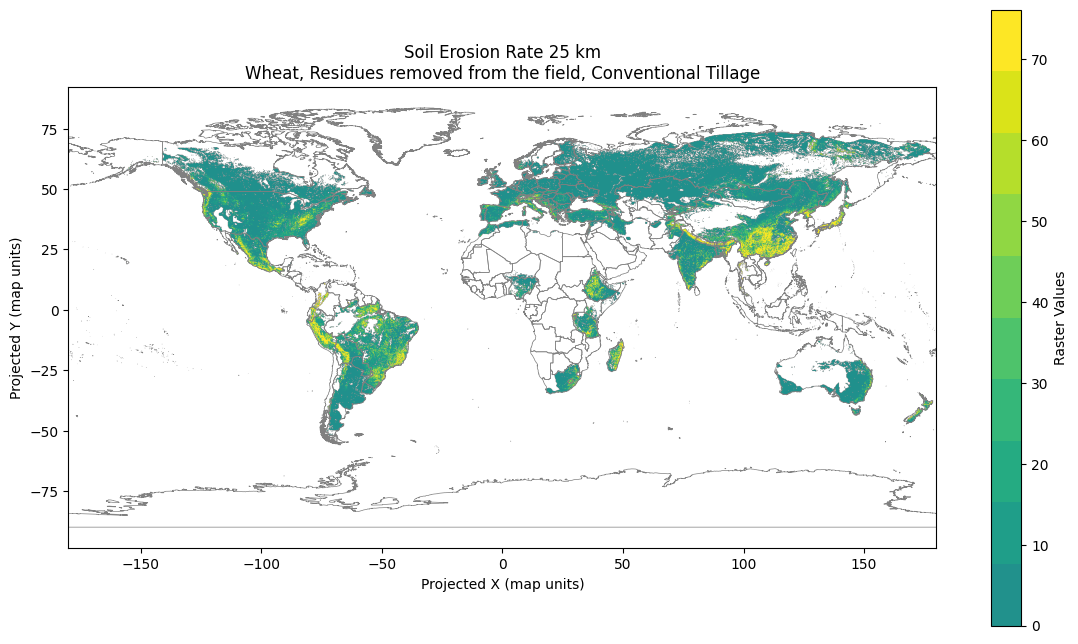

In [8]:
mp.plot_raster_on_world_extremes_cutoff(wheat_ron_fp, "Soil Erosion Rate 25 km\nWheat, Residues removed from the field, Conventional Tillage", perc_cutoff=5, quantiles=10)

C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\map_plotting.py:219: RuntimeWarning: overflow encountered in cast
  data = src.read(raster_band).astype("float32", copy=False)
C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\map_plotting.py:91: RuntimeWarning: overflow encountered in cast
  out[out == nodata_value] = np.nan


Raster has 147,743 unique values. Min: 0.06. Max: 19.98
Using quantiles
All positives route (quantiles)


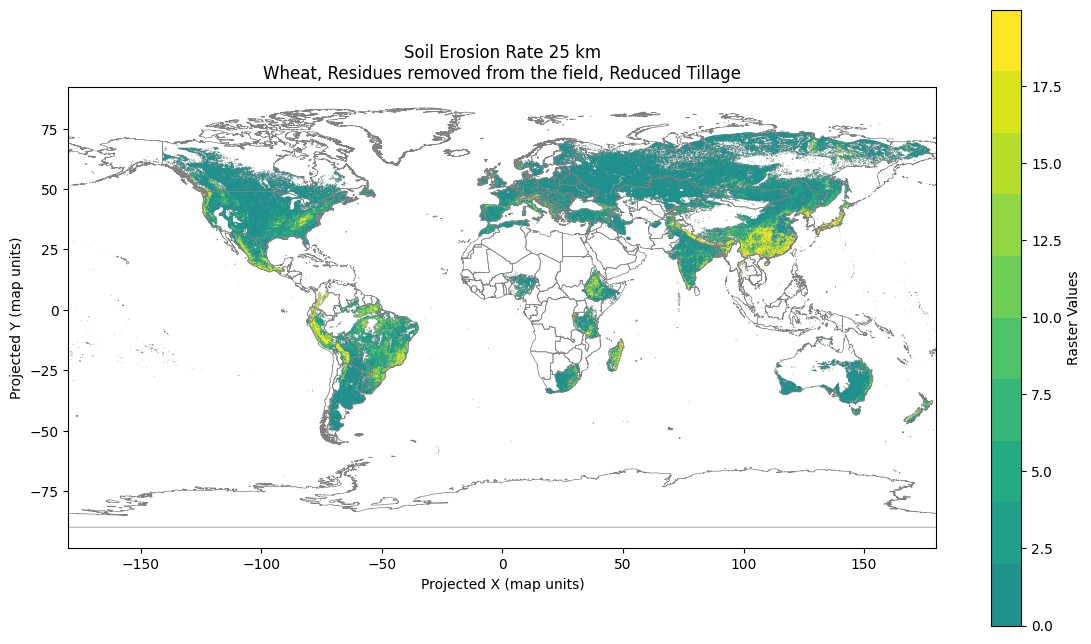

In [24]:
mp.plot_raster_on_world_extremes_cutoff(wheat_ron_rt_fp, "Soil Erosion Rate 25 km\nWheat, Residues removed from the field, Reduced Tillage", perc_cutoff=5, quantiles=10)

It can be seen immediately that the top values are lower for the reduced tillage option.

## Calculating regional averages
Now regional averages need to be calculated, following the same procedure as done for all baseline LEAFs

### Country
Defining needed parameters

In [63]:
# Inputs that stay the same
input_folder = "../LEAFs/soil_erosion/raster/"
output_folder = "../LEAFs/soil_erosion/"
cf_name="soil_erosion"
cf_unit="t soil/ha/yr"
reset_gpck = True
calc_kwargs=dict(outlier_method="log1p_win", std_thresh = 3)
file_filter= "_rt.tif"

In [64]:
# Inputs that change by area type
area_type = "country"
layer_name = "se_leaf_country"
corrected_shp = gpd.read_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')
master_key = "ADM0_NAME"
result_key = "country"
gpckg_name = "se_reducedtillage_country"

Running country averages

In [65]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder =input_folder,
    output_folder = output_folder,
    layer_name=layer_name,
    master_gdf=corrected_shp,           # e.g., countries, subcountries, or ecoregions
    master_key=master_key,              # 'ADM0_NAME', 'ADM1_NAME', 'ECO_NAME'
    result_key=result_key,              # must match the column emitted by your calc gdf
    file_filter= file_filter,
    gpckg_name = gpckg_name,
    cf_name=cf_name,
    cf_unit=cf_unit,
    area_type=area_type,
    calc_kwargs=calc_kwargs,
    reset_gpkg=reset_gpck,
    run_test=False                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2026-01-09 13:53:48,133 - INFO - Building 'se_leaf_country' from rasters in ../LEAFs/soil_erosion/raster/ into ../LEAFs/soil_erosion/ (../LEAFs/soil_erosion/se_reducedtillage_country.gpkg)



Processing rasters (se_leaf_country):   0%|          | 0/26 [00:00<?, ?raster/s]

2026-01-09 13:53:56,214 - INFO - Calculating soil_erosion for se_rate_25km_Barley_irr_roff_rt...
Calculating soil_erosion for se_rate_25km_Barley_irr_roff_rt...
2026-01-09 13:54:45,040 - INFO - Calculating soil_erosion for se_rate_25km_Barley_irr_ron_rt...
Calculating soil_erosion for se_rate_25km_Barley_irr_ron_rt...
2026-01-09 13:55:32,613 - INFO - Calculating soil_erosion for se_rate_25km_Barley_rf_roff_rt...
Calculating soil_erosion for se_rate_25km_Barley_rf_roff_rt...
2026-01-09 13:56:19,016 - INFO - Calculating soil_erosion for se_rate_25km_Barley_rf_ron_rt...
Calculating soil_erosion for se_rate_25km_Barley_rf_ron_rt...
2026-01-09 13:57:06,035 - INFO - Calculating soil_erosion for se_rate_25km_Cotton_irr_rt...
Calculating soil_erosion for se_rate_25km_Cotton_irr_rt...
2026-01-09 13:57:52,715 - INFO - Calculating soil_erosion for se_rate_25km_Cotton_rf_rt...
Calculating soil_erosion for se_rate_25km_Cotton_rf_rt...
2026-01-09 13:58:47,996 - INFO - Calculating soil_erosion for se

Wrote 21528 rows into ../LEAFs/soil_erosion/se_reducedtillage_country.gpkg


#### Checking results...

In [66]:
gdf_test_values = gpd.read_file(gpkg_path, layer=layer_name)
gdf_test_values.sort_values(by=["cf"], ascending=False).head()

,ADM0_NAME,flow_name,cf,cf_median,cf_std,_source_file
1670,Arunachal Pradesh,se_rate_25km_Maize_irr_roff_rt,186.806824,151.899307,140.352951,se_rate_25km_Maize_irr_roff_rt.tif
2222,Arunachal Pradesh,se_rate_25km_Maize_rf_roff_rt,186.806824,151.899307,140.352951,se_rate_25km_Maize_rf_roff_rt.tif
2239,Bhutan,se_rate_25km_Maize_rf_roff_rt,183.050552,164.956009,129.090836,se_rate_25km_Maize_rf_roff_rt.tif
1687,Bhutan,se_rate_25km_Maize_irr_roff_rt,183.050552,164.956009,129.090836,se_rate_25km_Maize_irr_roff_rt.tif
1118,Arunachal Pradesh,se_rate_25km_Cotton_irr_rt,181.095062,149.062775,147.265839,se_rate_25km_Cotton_irr_rt.tif


Merging geometries

In [67]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ADM0_NAME")

Plotting one crop

In [68]:
test_flow = "se_rate_25km_Barley_irr_ron_rt"

In [69]:
country_leafs_check = gdf_test[gdf_test["flow_name"]==test_flow]

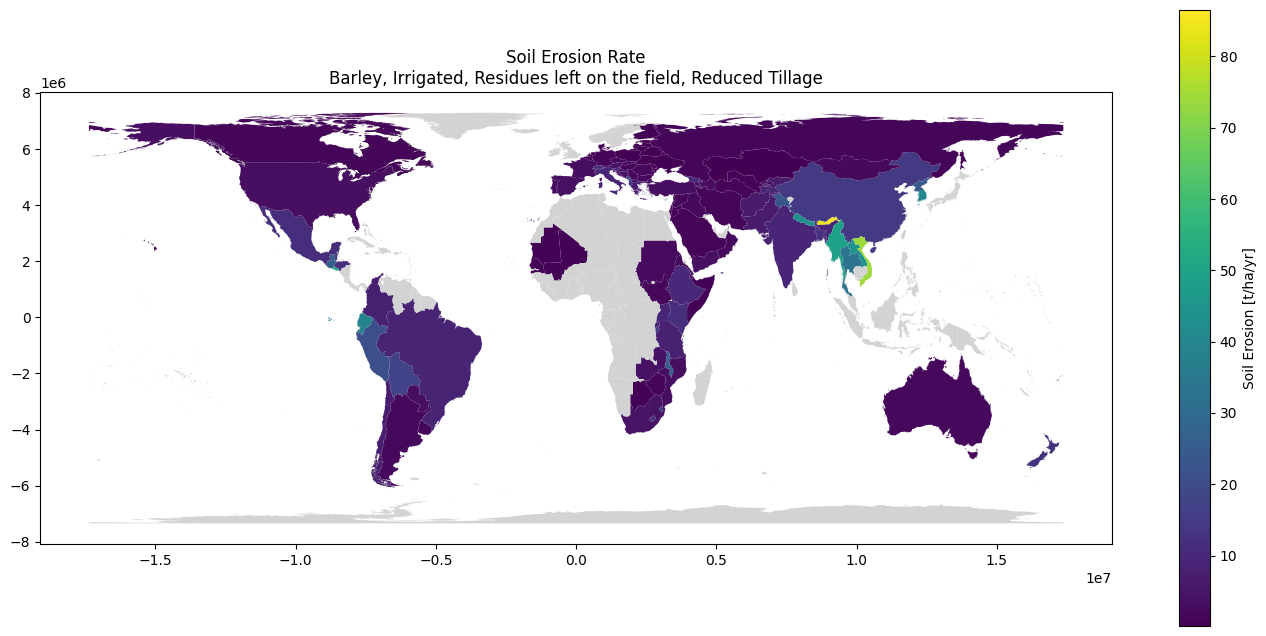

In [70]:
fig, ax = plt.subplots(figsize=(14, 8)) 
country_leafs_check.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Soil Erosion [t/ha/yr]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("Soil Erosion Rate\nBarley, Irrigated, Residues left on the field, Reduced Tillage")
plt.tight_layout() 
plt.show()

Cheching csv

In [71]:
df_results.sort_values(by="value", ascending=False).head(10)

,ADM0_NAME,country,value,metric,flow_name
4982,Arunachal Pradesh,Arunachal Pradesh,186.806823,cf_mean,se_rate_25km_Maize_irr_roff_rt
6638,Arunachal Pradesh,Arunachal Pradesh,186.806823,cf_mean,se_rate_25km_Maize_rf_roff_rt
6655,Bhutan,Bhutan,183.050551,cf_mean,se_rate_25km_Maize_rf_roff_rt
4999,Bhutan,Bhutan,183.050551,cf_mean,se_rate_25km_Maize_irr_roff_rt
3326,Arunachal Pradesh,Arunachal Pradesh,181.095059,cf_mean,se_rate_25km_Cotton_irr_rt
4154,Arunachal Pradesh,Arunachal Pradesh,181.095059,cf_mean,se_rate_25km_Cotton_rf_rt
5275,Bhutan,Bhutan,164.956007,cf_median,se_rate_25km_Maize_irr_roff_rt
6931,Bhutan,Bhutan,164.956007,cf_median,se_rate_25km_Maize_rf_roff_rt
5810,Arunachal Pradesh,Arunachal Pradesh,164.378268,cf_mean,se_rate_25km_Maize_irr_ron_rt
7466,Arunachal Pradesh,Arunachal Pradesh,164.378268,cf_mean,se_rate_25km_Maize_rf_ron_rt


Same values as those on gpckg. All looks ok

### Subcountries
Now proceeding, same as for countries, with sub-country regions.

Loading the necessary data and parameters

In [72]:
# Inputs that change by area type
area_type = "subcountry"
layer_name = "se_leaf_subcountry"
shp = gpd.read_file('../data/CountryLayers/SubCountry_Level1/g2015_2014_1.shp')
master_key = "ADM1_CODE"
result_key = "ADM1_CODE"
gpckg_name = "se_reducedtillage_subcountry"

Running the averages

In [73]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder =input_folder,
    output_folder = output_folder,
    layer_name=layer_name,
    master_gdf=shp,           # e.g., countries, subcountries, or ecoregions
    master_key=master_key,              # 'ADM0_NAME', 'ADM1_NAME', 'ECO_NAME'
    result_key=result_key,              # must match the column emitted by your calc gdf
    file_filter= file_filter,
    gpckg_name = gpckg_name,
    cf_name=cf_name,
    cf_unit=cf_unit,
    area_type=area_type,
    calc_kwargs=calc_kwargs,
    reset_gpkg=reset_gpck,
    run_test=False                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2026-01-09 14:20:07,282 - INFO - Building 'se_leaf_subcountry' from rasters in ../LEAFs/soil_erosion/raster/ into ../LEAFs/soil_erosion/ (../LEAFs/soil_erosion/se_reducedtillage_subcountry.gpkg)



Processing rasters (se_leaf_subcountry):   0%|          | 0/26 [00:00<?, ?raster/s]

2026-01-09 14:20:21,203 - INFO - Calculating soil_erosion for se_rate_25km_Barley_irr_roff_rt...
Calculating soil_erosion for se_rate_25km_Barley_irr_roff_rt...
2026-01-09 14:22:56,895 - INFO - Calculating soil_erosion for se_rate_25km_Barley_irr_ron_rt...
Calculating soil_erosion for se_rate_25km_Barley_irr_ron_rt...
2026-01-09 14:25:29,045 - INFO - Calculating soil_erosion for se_rate_25km_Barley_rf_roff_rt...
Calculating soil_erosion for se_rate_25km_Barley_rf_roff_rt...
2026-01-09 14:28:09,429 - INFO - Calculating soil_erosion for se_rate_25km_Barley_rf_ron_rt...
Calculating soil_erosion for se_rate_25km_Barley_rf_ron_rt...
2026-01-09 14:30:48,068 - INFO - Calculating soil_erosion for se_rate_25km_Cotton_irr_rt...
Calculating soil_erosion for se_rate_25km_Cotton_irr_rt...
2026-01-09 14:33:08,215 - INFO - Calculating soil_erosion for se_rate_25km_Cotton_rf_rt...
Calculating soil_erosion for se_rate_25km_Cotton_rf_rt...
2026-01-09 14:35:34,541 - INFO - Calculating soil_erosion for se

Wrote 266916 rows into ../LEAFs/soil_erosion/se_reducedtillage_subcountry.gpkg


#### Checking results

In [74]:
gdf_test_values = gpd.read_file(gpkg_path, layer=layer_name)
gdf_test_values.sort_values(by=["cf"], ascending=False).head()

,ADM1_CODE,flow_name,cf,cf_median,cf_std,_source_file
62993,1139,se_rate_25km_Soybeans_irr_rt,515.895874,515.895874,0.000000,se_rate_25km_Soybeans_irr_rt.tif
66415,1139,se_rate_25km_Soybeans_rf_rt,515.895874,515.895874,0.000000,se_rate_25km_Soybeans_rf_rt.tif
22663,41310,se_rate_25km_Maize_irr_roff_rt,442.913666,393.247559,55.528408,se_rate_25km_Maize_irr_roff_rt.tif
29507,41310,se_rate_25km_Maize_rf_roff_rt,442.913666,393.247559,55.528408,se_rate_25km_Maize_rf_roff_rt.tif
83444,3304,se_rate_25km_Wheat_rf_roff_rt,420.186859,420.186859,0.000000,se_rate_25km_Wheat_rf_roff_rt.tif


In [75]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ADM1_CODE")

Plotting one crop

In [76]:
subcountry_leafs_check = gdf_test[gdf_test["flow_name"]==test_flow]

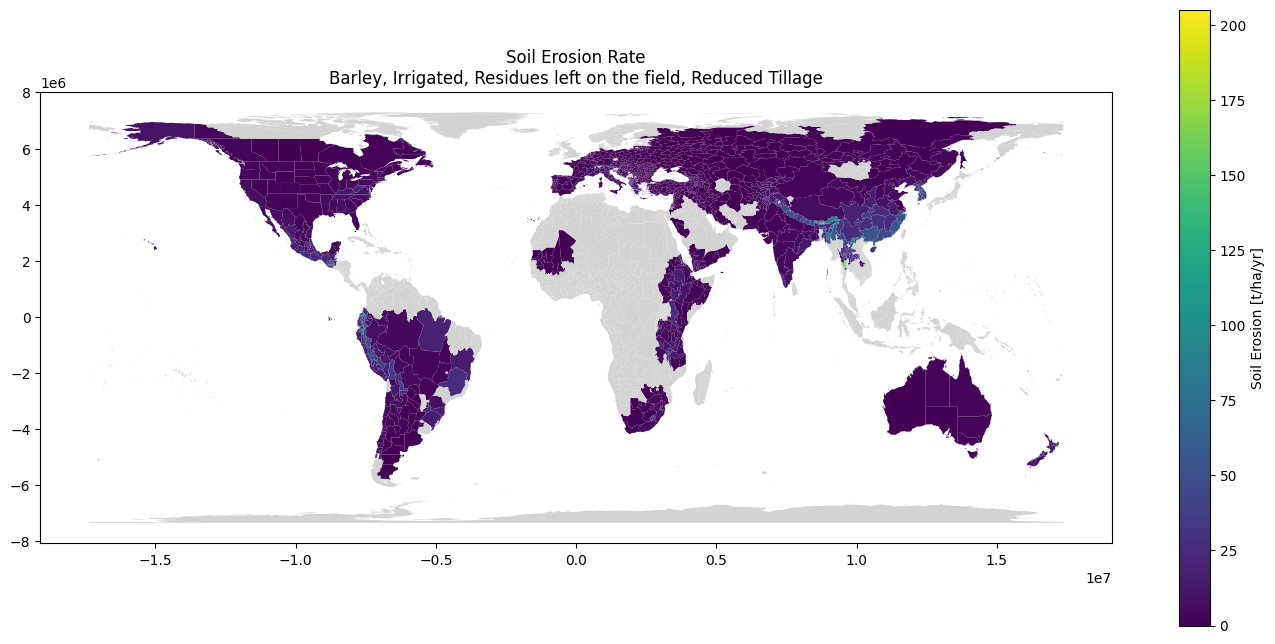

In [77]:
fig, ax = plt.subplots(figsize=(14, 8)) 
subcountry_leafs_check.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Soil Erosion [t/ha/yr]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("Soil Erosion Rate\nBarley, Irrigated, Residues left on the field, Reduced Tillage")
plt.tight_layout() 
plt.show()

### Ecoregions
Finally, ecoregions

In [78]:
# Inputs that change by area type
area_type = "ecoregion"
layer_name = "se_leaf_ecoregions"
master_key = "ECO_ID"
result_key = "er_id"
gpckg_name = "se_reducedtillage_ecoregions"
shp = gpd.read_file("../data/Ecoregions2017/Ecoregions2017.shp")

In [79]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder =input_folder,
    output_folder = output_folder,
    layer_name=layer_name,
    master_gdf=shp,           # e.g., countries, subcountries, or ecoregions
    master_key=master_key,              # 'ADM0_NAME', 'ADM1_NAME', 'ECO_NAME'
    result_key=result_key,              # must match the column emitted by your calc gdf
    file_filter= file_filter,
    gpckg_name = gpckg_name,
    cf_name=cf_name,
    cf_unit=cf_unit,
    area_type=area_type,
    calc_kwargs=calc_kwargs,
    reset_gpkg=reset_gpck,
    run_test=False                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2026-01-09 15:29:48,787 - INFO - Building 'se_leaf_ecoregions' from rasters in ../LEAFs/soil_erosion/raster/ into ../LEAFs/soil_erosion/ (../LEAFs/soil_erosion/se_reducedtillage_ecoregions.gpkg)



Processing rasters (se_leaf_ecoregions):   0%|          | 0/26 [00:00<?, ?raster/s]

2026-01-09 15:30:06,181 - INFO - Calculating soil_erosion for se_rate_25km_Barley_irr_roff_rt...
Calculating soil_erosion for se_rate_25km_Barley_irr_roff_rt...
2026-01-09 15:33:11,371 - INFO - Calculating soil_erosion for se_rate_25km_Barley_irr_ron_rt...
Calculating soil_erosion for se_rate_25km_Barley_irr_ron_rt...
2026-01-09 15:35:42,410 - INFO - Calculating soil_erosion for se_rate_25km_Barley_rf_roff_rt...
Calculating soil_erosion for se_rate_25km_Barley_rf_roff_rt...
2026-01-09 15:38:14,886 - INFO - Calculating soil_erosion for se_rate_25km_Barley_rf_ron_rt...
Calculating soil_erosion for se_rate_25km_Barley_rf_ron_rt...
2026-01-09 15:40:45,564 - INFO - Calculating soil_erosion for se_rate_25km_Cotton_irr_rt...
Calculating soil_erosion for se_rate_25km_Cotton_irr_rt...
2026-01-09 15:43:21,998 - INFO - Calculating soil_erosion for se_rate_25km_Cotton_rf_rt...
Calculating soil_erosion for se_rate_25km_Cotton_rf_rt...
2026-01-09 15:45:25,364 - INFO - Calculating soil_erosion for se

Wrote 66066 rows into ../LEAFs/soil_erosion/se_reducedtillage_ecoregions.gpkg


#### Checking Results

In [80]:
gdf_test_values = gpd.read_file(gpkg_path, layer=layer_name)
gdf_test_values.sort_values(by=["cf"], ascending=False).head()

,ECO_ID,flow_name,cf,cf_median,cf_std,_source_file
20364,520,se_rate_25km_Wheat_rf_roff_rt,406.159393,406.159393,0.00000,se_rate_25km_Wheat_rf_roff_rt.tif
5713,546,se_rate_25km_Maize_irr_roff_rt,381.687744,381.687744,0.00000,se_rate_25km_Maize_irr_roff_rt.tif
7407,546,se_rate_25km_Maize_rf_roff_rt,381.687744,381.687744,0.00000,se_rate_25km_Maize_rf_roff_rt.tif
20731,478,se_rate_25km_Wheat_rf_roff_rt,338.406708,192.340958,242.96051,se_rate_25km_Wheat_rf_roff_rt.tif
6560,546,se_rate_25km_Maize_irr_ron_rt,335.885223,335.885223,0.00000,se_rate_25km_Maize_irr_ron_rt.tif


In [81]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ECO_ID")

Plotting one crop

In [82]:
er_leafs_check = gdf_test[gdf_test["flow_name"]==test_flow]

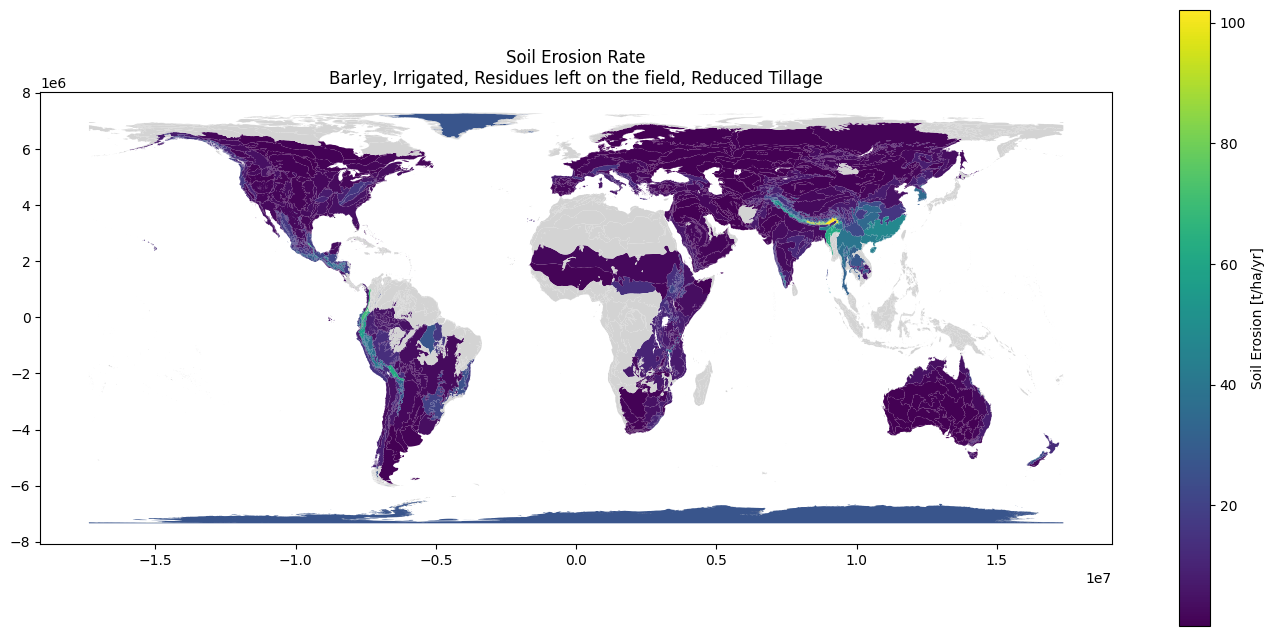

In [83]:
fig, ax = plt.subplots(figsize=(14, 8)) 
er_leafs_check.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Soil Erosion [t/ha/yr]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("Soil Erosion Rate\nBarley, Irrigated, Residues left on the field, Reduced Tillage")
plt.tight_layout() 
plt.show()